<a href="https://colab.research.google.com/github/qahathaway/vBMD/blob/main/Google%20Colab/Colab%20Runtime%20Code%20for%20T1-T10%20vBMD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This Google Colab worksheet illustrates Steps 3-8 in the "Semantic_Segmentation_Pectoralis.ipynb" Jupyter Notebook script on GitHub

# A) Change the system Python version to 3.8

In [ ]:
!wget -O mini.sh https://repo.anaconda.com/miniconda/Miniconda3-py38_4.8.2-Linux-x86_64.sh
!chmod +x mini.sh
!bash ./mini.sh -b -f -p /usr/local
!conda install -q -y jupyter
!conda install -q -y google-colab -c conda-forge
!python -m ipykernel install --name "py38" --user

--2023-07-08 16:21:00--  https://repo.anaconda.com/miniconda/Miniconda3-py38_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89817099 (86M) [application/x-sh]
Saving to: ‘mini.sh’

mini.sh             100%[===================>]  85.66M   147MB/s    in 0.6s    

2023-07-08 16:21:01 (147 MB/s) - ‘mini.sh’ saved [89817099/89817099]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py38_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py38_0
    - cffi==1.14.0=py38h2e261b9_0
    - chardet==3.0.4=py38_1003
    - conda-package-handling==1.6.0=py38h7b6447c_0
    - conda==4.8.2=py38_0
    - cryptography==2.8=

# B) **MANUALLY REFRESH THE WEB BROWSER**, Simply resarting the runtime will not work to incorporate Python 3.8 into the system runtime

# C) Comfirm that we are using Python 3.8

In [1]:
import sys
print("User Current Version:-", sys.version)

User Current Version:- 3.8.18 (default, Sep 11 2023, 13:20:55) 
[GCC 11.2.0]


In [2]:
!python --version

Python 3.8.18


# D) Clone the GitHub repository

In [4]:
!git clone https://github.com/qahathaway/vBMD.git

Cloning into 'vBMD'...
remote: Enumerating objects: 15818, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 15818 (delta 50), reused 75 (delta 20), pack-reused 15674
Receiving objects: 100% (15818/15818), 1.44 GiB | 33.05 MiB/s, done.
Resolving deltas: 100% (51/51), done.
Updating files: 100% (16288/16288), done.
Filtering content: 100% (3/3), 512.79 MiB | 39.45 MiB/s, done.


# E) Make folders to contain analysis images

In [26]:
!mkdir /content/vBMD/Selected_Axial
!mkdir /content/vBMD/Selected_Axial/Patient
!mkdir /content/vBMD/Selected_Sagittal
!mkdir /content/vBMD/Selected_Sagittal/Upper
!mkdir /content/vBMD/Selected_Sagittal/Upper/Patient
!mkdir /content/vBMD/Selected_Sagittal/Lower
!mkdir /content/vBMD/Selected_Sagittal/Lower/Patient
!mkdir /content/vBMD/Output
!mkdir /content/vBMD/Output/Axial
!mkdir /content/vBMD/Output/Sagittal
!mkdir /content/vBMD/Mask_Infer
!mkdir /content/vBMD/Mask_Infer/Axial
!mkdir /content/vBMD/Mask_Infer/Sagittal

mkdir: cannot create directory ‘/content/vBMD/Selected_Axial’: File exists
mkdir: cannot create directory ‘/content/vBMD/Selected_Axial/Patient’: File exists
mkdir: cannot create directory ‘/content/vBMD/Selected_Sagittal’: File exists
mkdir: cannot create directory ‘/content/vBMD/Selected_Sagittal/Upper’: File exists
mkdir: cannot create directory ‘/content/vBMD/Selected_Sagittal/Upper/Patient’: File exists
mkdir: cannot create directory ‘/content/vBMD/Selected_Sagittal/Lower’: File exists
mkdir: cannot create directory ‘/content/vBMD/Selected_Sagittal/Lower/Patient’: File exists
mkdir: cannot create directory ‘/content/vBMD/Output’: File exists
mkdir: cannot create directory ‘/content/vBMD/Output/Axial’: File exists
mkdir: cannot create directory ‘/content/vBMD/Output/Sagittal’: File exists
mkdir: cannot create directory ‘/content/vBMD/Mask_Infer’: File exists
mkdir: cannot create directory ‘/content/vBMD/Mask_Infer/Axial’: File exists
mkdir: cannot create directory ‘/content/vBMD/Ma

# F) Load dependencies for frame selection

In [6]:
!pip install opencv-python
!pip install imutils

     |████████████████████████████████| 61.7 MB 80 kB/s 
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25858 sha256=30f708061da11dc5182b83e35fd6289fd9ef82c7a58c70bdcb8133aba2e99d44
  Stored in directory: /root/.cache/pip/wheels/59/1b/52/0dea905f8278d5514dc4d0be5e251967f8681670cadd3dca89
Successfully built imutils


# Step 3a: Select T1-T10 vertebral bodies in the axial view at a depth of 5 mm

In [65]:
### Load Essential Packages ###
import numpy as np
import pandas as pd
import os
import cv2
from imutils import paths
import argparse
import glob
from glob import iglob

# Create empty array for pixel intensities and filenames #
t1 = []
n_white_pix = []
n_white_pix2 = []
n_white_pix3 = []
names = []
names2 = []
index = 0

### Extract T1-T10 Axial Images at the 5 mm depth. This approach utilizes 3 seperate extractions (i.e., a total of 30 images) ###
### For example, this is a semi-automated approach using T1, T1X, and T1XX as 3 seperate variations of T1 that will be extracted ##
### Manual selection of the appropriate image is needed ###
### To fully automate, only use T1, with some reduced accuracy ###

for filename in sorted(glob.glob('/content/vBMD/Example/**/axial_*.png'), key=lambda name: (name[22:29], int(os.path.basename(name)[14:-4]))):
    image = cv2.imread(filename)
    image2 = cv2.imread(filename)
    image3 = cv2.imread(filename)
    names.append(filename)
    names2.append(filename)
    pathlen, filenamed = os.path.split(filename)
    file_count = len(glob.glob1(pathlen,"axial_*.png"))

    # More Conservative Cropped Area for T1-T5 #
    image[image <= 90] = 0
    cropped = image[260:430, 210:302]
    n_white_pix = np.append(n_white_pix, np.sum(cropped > 0))

    # Less Conservative Cropped Area for T6-T10 #
    image2[image2 <= 90] = 0
    cropped2 = image2[210:450, 150:362]
    n_white_pix2 = np.append(n_white_pix2, np.sum(cropped2 > 0))

    # Lung Window to find T1 #
    image3[image3 >= 10] = 255
    image3[image3 <= 10] = 0
    cropped3 = image3[225:360, 110:402]
    cropped3b = np.invert(cropped3)
    n_white_pix3 = np.append(n_white_pix3, np.sum(cropped3b > 0))

    index += 1
    if index == file_count:
        namesflip = np.flip(names2)
        pixflip = np.flip(n_white_pix3)


        # T1 Based on Lung Window #
        t1 = (np.argmax(pixflip[(int(file_count*0)):(int(file_count*0.3))] > (int(max(pixflip[(int(file_count*0)):(int(file_count*0.3))])* 0.25)))) + int(file_count*0)
        minimum = (np.argmin(n_white_pix[(int(file_count-(t1+5))):(int(file_count-(t1-5)))])) + (int(file_count-(t1+5)))
        midline = cv2.imread(names[minimum])
        path, filenames = os.path.split(names[minimum])
        path2 = os.path.basename(path)
        cv2.imwrite('/content/vBMD/Selected_Axial/' + path2 + '/' + 'T1_' + filenames, midline)


        # Defining Next Search Area for T2 #
        minimum2 = (np.argmin(n_white_pix[(int(minimum * 0.91)):(int(minimum * 0.94))]) + (int(minimum * 0.92)))
        int2 = (int(names[minimum][44:-4]) - int(names[minimum2][44:-4]))
        # Distance Criteria: The Next Image can be No Farther than Specified Distance #
        if int2 >= (minimum*0.07):
            minimum2 = (np.argmin(n_white_pix[(int(minimum * 0.91)):(int(minimum * 0.94))]) + (int(minimum * 0.92))) + int(int2 - (minimum*0.07))
            midline = cv2.imread(names[minimum2])
            path, filenames = os.path.split(names[minimum2])
            path2 = os.path.basename(path)
            cv2.imwrite('/content/vBMD/Selected_Axial//' + path2 + '/' + 'T2_' + filenames, midline)
        # Distance Criteria: The Next Image can be No Closer than Specified Distance #
        elif int2 <= (minimum*0.055):
            minimum2 = (np.argmin(n_white_pix[(int(minimum * 0.91)):(int(minimum * 0.94))]) + (int(minimum * 0.92))) - int((minimum*0.055) - int2)
            midline = cv2.imread(names[minimum2])
            path, filenames = os.path.split(names[minimum2])
            path2 = os.path.basename(path)
            cv2.imwrite('/content/vBMD/Selected_Axial//' + path2 + '/' + 'T2_' + filenames, midline)
        # Does Not Meet Distance Criteria #
        else:
            midline = cv2.imread(names[minimum2])
            path, filenames = os.path.split(names[minimum2])
            path2 = os.path.basename(path)
            cv2.imwrite('/content/vBMD/Selected_Axial//' + path2 + '/' + 'T2_' + filenames, midline)



        # Defining Next Search Area for T3 #
        minimum3 = (np.argmin(n_white_pix[(int(minimum * 0.85)):(int(minimum * 0.87))]) + (int(minimum * 0.86)))
        int3 = (int(names[minimum2][44:-4]) - int(names[minimum3][44:-4]))
        # Distance Criteria: The Next Image can be No Farther than Specified Distance #
        if int3 >= (minimum*0.075):
            minimum3 = (np.argmin(n_white_pix[(int(minimum * 0.85)):(int(minimum * 0.87))]) + (int(minimum * 0.86))) + int(int3 - (minimum*0.075))
            midline = cv2.imread(names[minimum3])
            path, filenames = os.path.split(names[minimum3])
            path2 = os.path.basename(path)
            cv2.imwrite('/content/vBMD/Selected_Axial//' + path2 + '/' + 'T3_' + filenames, midline)
        # Distance Criteria: The Next Image can be No Closer than Specified Distance #
        elif int3 <= (minimum*0.06):
            minimum3 = (np.argmin(n_white_pix[(int(minimum * 0.85)):(int(minimum * 0.87))]) + (int(minimum * 0.86))) - int((minimum*0.06) - int3)
            midline = cv2.imread(names[minimum3])
            path, filenames = os.path.split(names[minimum3])
            path2 = os.path.basename(path)
            cv2.imwrite('/content/vBMD/Selected_Axial//' + path2 + '/' + 'T3_' + filenames, midline)
        # Does Not Meet Distance Criteria #
        else:
            midline = cv2.imread(names[minimum3])
            path, filenames = os.path.split(names[minimum3])
            path2 = os.path.basename(path)
            cv2.imwrite('/content/vBMD/Selected_Axial//' + path2 + '/' + 'T3_' + filenames, midline)



        # Defining Next Search Area for T4 #
        minimum4 = (np.argmin(n_white_pix[(int(minimum * 0.78)):(int(minimum * 0.80))]) + (int(minimum * 0.79)))
        int4 = (int(names[minimum3][44:-4]) - int(names[minimum4][44:-4]))
        # Distance Criteria: The Next Image can be No Farther than Specified Distance #
        if int4 >= (minimum*0.075):
            minimum4 = (np.argmin(n_white_pix[(int(minimum * 0.78)):(int(minimum * 0.80))]) + (int(minimum * 0.79))) + int(int4 - (minimum*0.075))
            midline = cv2.imread(names[minimum4])
            path, filenames = os.path.split(names[minimum4])
            path2 = os.path.basename(path)
            cv2.imwrite('/content/vBMD/Selected_Axial//' + path2 + '/' + 'T4_' + filenames, midline)
        # Distance Criteria: The Next Image can be No Closer than Specified Distance #
        elif int4 <= (minimum*0.06):
            minimum4 = (np.argmin(n_white_pix[(int(minimum * 0.78)):(int(minimum * 0.80))]) + (int(minimum * 0.79))) - int((minimum*0.06) - int4)
            midline = cv2.imread(names[minimum4])
            path, filenames = os.path.split(names[minimum4])
            path2 = os.path.basename(path)
            cv2.imwrite('/content/vBMD/Selected_Axial//' + path2 + '/' + 'T4_' + filenames, midline)
        # Does Not Meet Distance Criteria #
        else:
            midline = cv2.imread(names[minimum4])
            path, filenames = os.path.split(names[minimum4])
            path2 = os.path.basename(path)
            cv2.imwrite('/content/vBMD/Selected_Axial//' + path2 + '/' + 'T4_' + filenames, midline)



        # Defining Next Search Area for T5 #
        minimum5 = (np.argmin(n_white_pix[(int(minimum * 0.71)):(int(minimum * 0.73))]) + (int(minimum * 0.72)))
        int5 = (int(names[minimum4][44:-4]) - int(names[minimum5][44:-4]))
        # Distance Criteria: The Next Image can be No Farther than Specified Distance #
        if int5 >= (minimum*0.075):
            minimum5 = (np.argmin(n_white_pix[(int(minimum * 0.71)):(int(minimum * 0.73))]) + (int(minimum * 0.72))) + int(int5 - (minimum*0.075))
            midline = cv2.imread(names[minimum5])
            path, filenames = os.path.split(names[minimum5])
            path2 = os.path.basename(path)
            cv2.imwrite('/content/vBMD/Selected_Axial//' + path2 + '/' + 'T5_' + filenames, midline)
        # Distance Criteria: The Next Image can be No Closer than Specified Distance #
        elif int5 <= (minimum*0.06):
            minimum5 = (np.argmin(n_white_pix[(int(minimum * 0.71)):(int(minimum * 0.73))]) + (int(minimum * 0.72))) - int((minimum*0.06) - int5)
            midline = cv2.imread(names[minimum5])
            path, filenames = os.path.split(names[minimum5])
            path2 = os.path.basename(path)
            cv2.imwrite('/content/vBMD/Selected_Axial//' + path2 + '/' + 'T5_' + filenames, midline)
        # Does Not Meet Distance Criteria #
        else:
            midline = cv2.imread(names[minimum5])
            path, filenames = os.path.split(names[minimum5])
            path2 = os.path.basename(path)
            cv2.imwrite('/content/vBMD/Selected_Axial//' + path2 + '/' + 'T5_' + filenames, midline)



        # Defining Next Search Area for T6 #
        minimum6 = (np.argmin(n_white_pix2[(int(minimum * 0.62)):(int(minimum * 0.64))]) + (int(minimum * 0.63)))
        int6 = (int(names[minimum5][44:-4]) - int(names[minimum6][44:-4]))
        # Distance Criteria: The Next Image can be No Farther than Specified Distance #
        if int6 >= (minimum*0.08):
            minimum6 = (np.argmin(n_white_pix2[(int(minimum * 0.62)):(int(minimum * 0.64))]) + (int(minimum * 0.63))) + int(int6 - (minimum*0.08))
            midline = cv2.imread(names[minimum6])
            path, filenames = os.path.split(names[minimum6])
            path2 = os.path.basename(path)
            cv2.imwrite('/content/vBMD/Selected_Axial//' + path2 + '/' + 'T6_' + filenames, midline)
        # Distance Criteria: The Next Image can be No Closer than Specified Distance #
        elif int6 <= (minimum*0.065):
            minimum6 = (np.argmin(n_white_pix2[(int(minimum * 0.62)):(int(minimum * 0.64))]) + (int(minimum * 0.63))) - int((minimum*0.065) - int6)
            midline = cv2.imread(names[minimum6])
            path, filenames = os.path.split(names[minimum6])
            path2 = os.path.basename(path)
            cv2.imwrite('/content/vBMD/Selected_Axial//' + path2 + '/' + 'T6_' + filenames, midline)
        # Does Not Meet Distance Criteria #
        else:
            midline = cv2.imread(names[minimum6])
            path, filenames = os.path.split(names[minimum6])
            path2 = os.path.basename(path)
            cv2.imwrite('/content/vBMD/Selected_Axial//' + path2 + '/' + 'T6_' + filenames, midline)



        # Defining Next Search Area for T7 #
        minimum7 = (np.argmin(n_white_pix2[(int(minimum * 0.55)):(int(minimum * 0.57))]) + (int(minimum * 0.56)))
        int7 = (int(names[minimum6][44:-4]) - int(names[minimum7][44:-4]))
        # Distance Criteria: The Next Image can be No Farther than Specified Distance #
        if int7 >= (minimum*0.08):
            minimum7 = (np.argmin(n_white_pix2[(int(minimum * 0.55)):(int(minimum * 0.57))]) + (int(minimum * 0.56))) + int(int7 - (minimum*0.08))
            midline = cv2.imread(names[minimum7])
            path, filenames = os.path.split(names[minimum7])
            path2 = os.path.basename(path)
            cv2.imwrite('/content/vBMD/Selected_Axial//' + path2 + '/' + 'T7_' + filenames, midline)
        # Distance Criteria: The Next Image can be No Closer than Specified Distance #
        elif int7 <= (minimum*0.065):
            minimum7 = (np.argmin(n_white_pix2[(int(minimum * 0.55)):(int(minimum * 0.57))]) + (int(minimum * 0.56))) - int((minimum*0.065) - int7)
            midline = cv2.imread(names[minimum7])
            path, filenames = os.path.split(names[minimum7])
            path2 = os.path.basename(path)
            cv2.imwrite('/content/vBMD/Selected_Axial//' + path2 + '/' + 'T7_' + filenames, midline)
        # Does Not Meet Distance Criteria #
        else:
            midline = cv2.imread(names[minimum7])
            path, filenames = os.path.split(names[minimum7])
            path2 = os.path.basename(path)
            cv2.imwrite('/content/vBMD/Selected_Axial//' + path2 + '/' + 'T7_' + filenames, midline)



        # Defining Next Search Area for T8 #
        minimum8 = (np.argmin(n_white_pix2[(int(minimum * 0.45)):(int(minimum * 0.49))]) + (int(minimum * 0.46)))
        int8 = (int(names[minimum7][44:-4]) - int(names[minimum8][44:-4]))
        # Distance Criteria: The Next Image can be No Farther than Specified Distance #
        if int8 >= (minimum*0.085):
            minimum8 = (np.argmin(n_white_pix2[(int(minimum * 0.45)):(int(minimum * 0.49))]) + (int(minimum * 0.46))) + int(int8 - (minimum*0.085))
            midline = cv2.imread(names[minimum8])
            path, filenames = os.path.split(names[minimum8])
            path2 = os.path.basename(path)
            cv2.imwrite('/content/vBMD/Selected_Axial//' + path2 + '/' + 'T8_' + filenames, midline)
        # Distance Criteria: The Next Image can be No Closer than Specified Distance #
        elif int8 <= (minimum*0.07):
            minimum8 = (np.argmin(n_white_pix2[(int(minimum * 0.45)):(int(minimum * 0.49))]) + (int(minimum * 0.46))) - int((minimum*0.07) - int8)
            midline = cv2.imread(names[minimum8])
            path, filenames = os.path.split(names[minimum8])
            path2 = os.path.basename(path)
            cv2.imwrite('/content/vBMD/Selected_Axial//' + path2 + '/' + 'T8_' + filenames, midline)
        # Does Not Meet Distance Criteria #
        else:
            midline = cv2.imread(names[minimum8])
            path, filenames = os.path.split(names[minimum8])
            path2 = os.path.basename(path)
            cv2.imwrite('/content/vBMD/Selected_Axial//' + path2 + '/' + 'T8_' + filenames, midline)



        # Defining Next Search Area for T9 #
        minimum9 = (np.argmin(n_white_pix2[(int(minimum * 0.37)):(int(minimum * 0.41))]) + (int(minimum * 0.39)))
        int9 = (int(names[minimum8][44:-4]) - int(names[minimum9][44:-4]))
        # Distance Criteria: The Next Image can be No Farther than Specified Distance #
        if int9 >= (minimum*0.09):
            minimum9 = (np.argmin(n_white_pix2[(int(minimum * 0.37)):(int(minimum * 0.41))]) + (int(minimum * 0.39))) + int(int9 - (minimum*0.09))
            midline = cv2.imread(names[minimum9])
            path, filenames = os.path.split(names[minimum9])
            path2 = os.path.basename(path)
            cv2.imwrite('/content/vBMD/Selected_Axial//' + path2 + '/' + 'T9_' + filenames, midline)
        # Distance Criteria: The Next Image can be No Closer than Specified Distance #
        elif int9 <= (minimum*0.075):
            minimum9 = (np.argmin(n_white_pix2[(int(minimum * 0.37)):(int(minimum * 0.41))]) + (int(minimum * 0.39))) - int((minimum*0.075) - int9)
            midline = cv2.imread(names[minimum9])
            path, filenames = os.path.split(names[minimum9])
            path2 = os.path.basename(path)
            cv2.imwrite('/content/vBMD/Selected_Axial//' + path2 + '/' + 'T9_' + filenames, midline)
        # Does Not Meet Distance Criteria #
        else:
            midline = cv2.imread(names[minimum9])
            path, filenames = os.path.split(names[minimum9])
            path2 = os.path.basename(path)
            cv2.imwrite('/content/vBMD/Selected_Axial//' + path2 + '/' + 'T9_' + filenames, midline)



        # Defining Next Search Area for T10 #
        minimum10 = (np.argmin(n_white_pix2[(int(minimum * 0.29)):(int(minimum * 0.33))]) + (int(minimum * 0.31)))
        int10 = (int(names[minimum9][44:-4]) - int(names[minimum10][44:-4]))
        # Distance Criteria: The Next Image can be No Farther than Specified Distance #
        if int10 >= (minimum*0.095):
            minimum10 = (np.argmin(n_white_pix2[(int(minimum * 0.29)):(int(minimum * 0.33))]) + (int(minimum * 0.31))) + int(int10 - (minimum*0.095))
            midline = cv2.imread(names[minimum10])
            path, filenames = os.path.split(names[minimum10])
            path2 = os.path.basename(path)
            cv2.imwrite('/content/vBMD/Selected_Axial//' + path2 + '/' + 'T10_' + filenames, midline)
        # Distance Criteria: The Next Image can be No Closer than Specified Distance #
        elif int10 <= (minimum*0.08):
            minimum10 = (np.argmin(n_white_pix2[(int(minimum * 0.29)):(int(minimum * 0.33))]) + (int(minimum * 0.31))) - int((minimum*0.08) - int10)
            midline = cv2.imread(names[minimum10])
            path, filenames = os.path.split(names[minimum10])
            path2 = os.path.basename(path)
            cv2.imwrite('/content/vBMD/Selected_Axial//' + path2 + '/' + 'T10_' + filenames, midline)
        # Does Not Meet Distance Criteria #
        else:
            midline = cv2.imread(names[minimum10])
            path, filenames = os.path.split(names[minimum10])
            path2 = os.path.basename(path)
            cv2.imwrite('/content/vBMD/Selected_Axial//' + path2 + '/' + 'T10_' + filenames, midline)



        index = 0
        n_white_pix = []
        n_white_pix2 = []
        n_white_pix3 = []
        names = []
        names2 = []
        file_count = []

    else:
        continue

# **Display Images from Axial T1-T10**

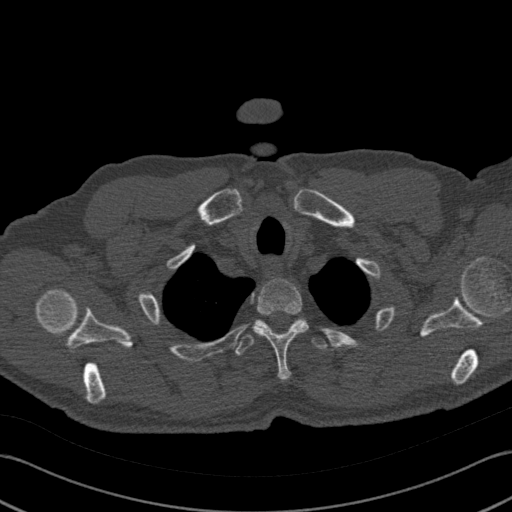

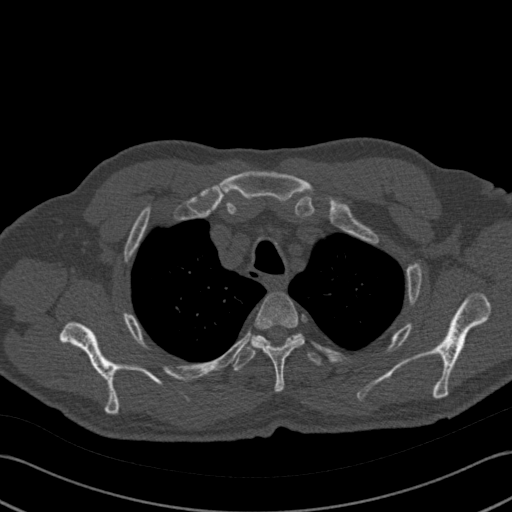

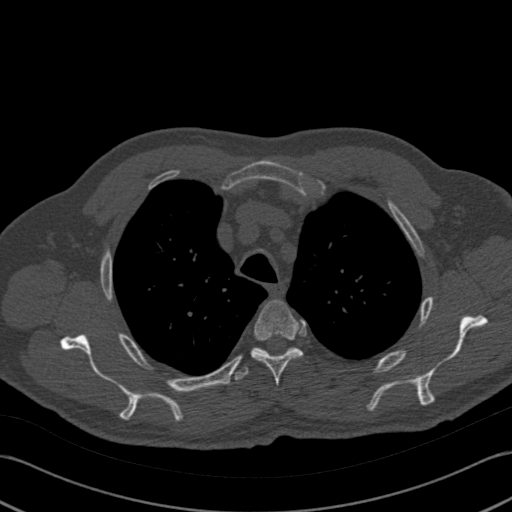

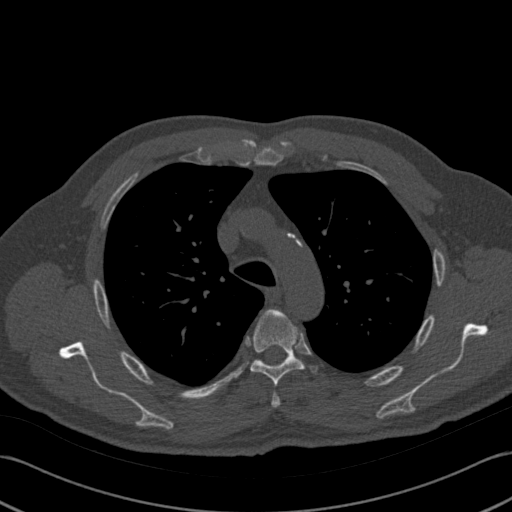

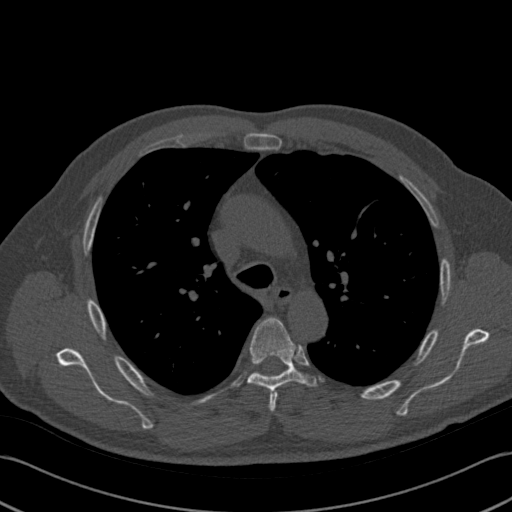

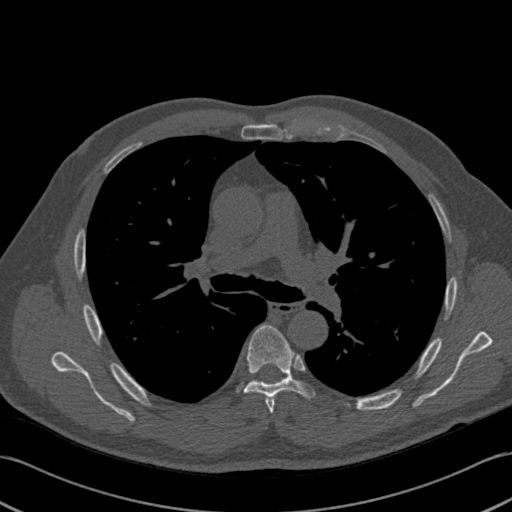

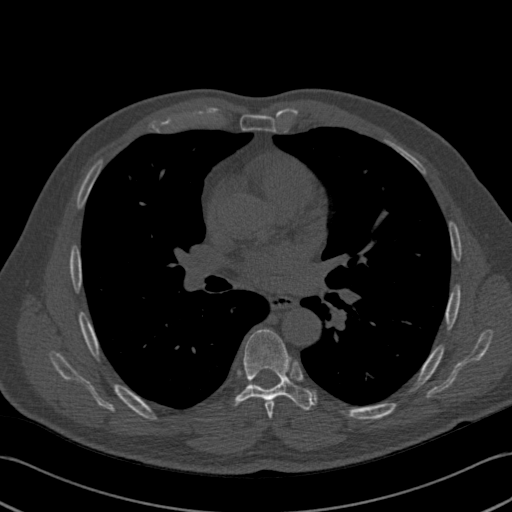

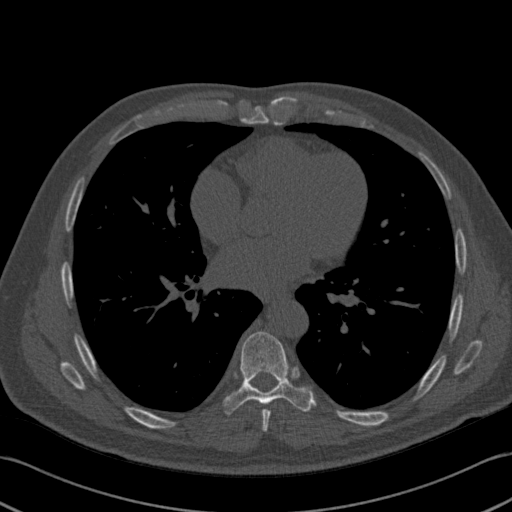

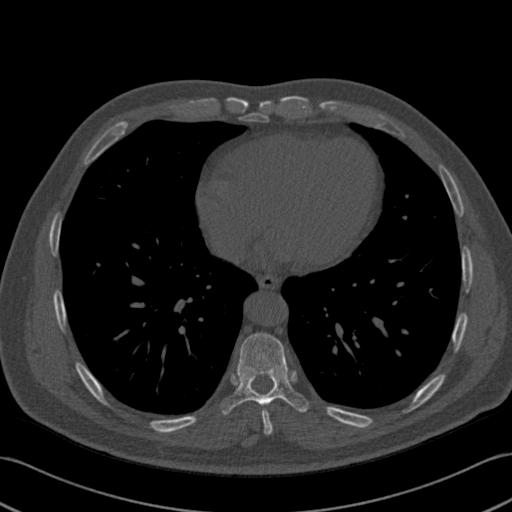

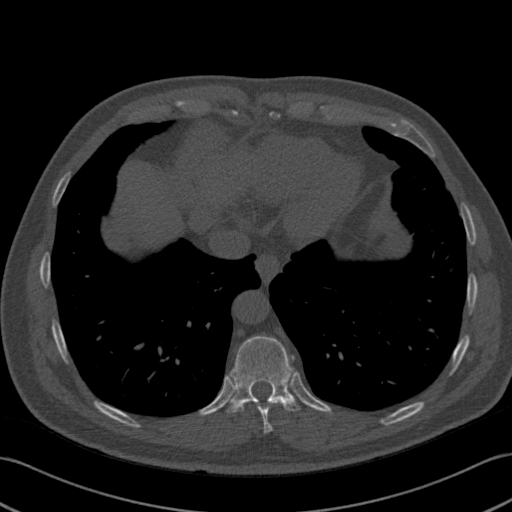

In [66]:
from IPython.display import Image, display
display(Image('/content/vBMD/Selected_Axial/Patient/T1_axial_IM-0385_520.png'))
display(Image('/content/vBMD/Selected_Axial/Patient/T2_axial_IM-0385_483.png'))
display(Image('/content/vBMD/Selected_Axial/Patient/T3_axial_IM-0385_452.png'))
display(Image('/content/vBMD/Selected_Axial/Patient/T4_axial_IM-0385_420.png'))
display(Image('/content/vBMD/Selected_Axial/Patient/T5_axial_IM-0385_381.png'))
display(Image('/content/vBMD/Selected_Axial/Patient/T6_axial_IM-0385_339.png'))
display(Image('/content/vBMD/Selected_Axial/Patient/T7_axial_IM-0385_297.png'))
display(Image('/content/vBMD/Selected_Axial/Patient/T8_axial_IM-0385_252.png'))
display(Image('/content/vBMD/Selected_Axial/Patient/T9_axial_IM-0385_208.png'))
display(Image('/content/vBMD/Selected_Axial/Patient/T10_axial_IM-0385_167.png'))

# Step 3b: Select T1-T10 vertebral bodies in the sagittal view using both an upper and lower view of the spine

In [18]:
### Load Essential Packages ###
import numpy as np
import pandas as pd
import os
import cv2
from imutils import paths
import argparse
import glob
from glob import iglob

# Create empty array for pixel intensities and filenames #
n_white_pixUpper = []
n_white_pixLower = []
names = []
index = 0

### Extract Sagittal Images for the Upper (T1-T5) and Lower (T6-T10) Spine ###
for filename in sorted(glob.glob('/content/vBMD/Example/**/sagittal*.png'), key=lambda name: (name[22:29], int(os.path.basename(name)[17:-4]))):
    image = cv2.imread(filename)
    names.append(filename)
    pathlen, filenamed = os.path.split(filename)
    file_count = len(glob.glob1(pathlen,"sagittal_*.png"))
    image[image <= 90] = 0

    # Cropped Area and Pixel Intensities for the Upper Spine #
    croppedUpper = image[50:370, 200:512]
    n_white_pixUpper = np.append(n_white_pixUpper, np.sum(croppedUpper > 0))

    # Cropped Area and Pixel Intensities for the Lower Spine #
    croppedLower = image[320:640, 200:512]
    n_white_pixLower = np.append(n_white_pixLower, np.sum(croppedLower > 0))
    index += 1

    if index == file_count:
        namesflipUpper = np.flip(names)
        pixflipUpper = np.flip(n_white_pixUpper)
        namesflipLower = np.flip(names)
        pixflipLower = np.flip(n_white_pixLower)

        # Create a Pixel Intensity Curve and Threshhold Value to the Left and Right for Upper Spine #
        leftUpper = (np.argmax(n_white_pixUpper[(int(file_count*0.3)):(int(file_count*0.7))] > (int(max(n_white_pixUpper[(int(file_count*0.3)):(int(file_count*0.7))])* 0.75)))) + int(file_count*0.3)
        rightUpper = 512 - ((np.argmax(pixflipUpper[(int(file_count*0.3)):(int(file_count*0.7))] > (int(max(pixflipUpper[(int(file_count*0.3)):(int(file_count*0.7))])* 0.45)))) + int(file_count*0.3))

        # Create a Pixel Intensity Curve and Threshhold Value to the Left and Right for Lower Spine#
        leftLower = (np.argmax(n_white_pixLower[(int(file_count*0.3)):(int(file_count*0.7))] > (int(max(n_white_pixLower[(int(file_count*0.3)):(int(file_count*0.7))])* 0.5)))) + int(file_count*0.3)
        rightLower = 512 - ((np.argmax(pixflipLower[(int(file_count*0.3)):(int(file_count*0.7))] > (int(max(pixflipLower[(int(file_count*0.3)):(int(file_count*0.7))])* 0.5)))) + int(file_count*0.3))

        # Choose the Middle of the Two Points #
        middleUpper = int((rightUpper+leftUpper)/2)
        middleLower = int((rightLower+leftLower)/2)
        midlineUpper = cv2.imread(names[middleUpper])
        midlineLower = cv2.imread(names[middleLower])
        pathUpper, filenamesUpper = os.path.split(names[middleUpper])
        pathLower, filenamesLower = os.path.split(names[middleLower])
        path2Upper = os.path.basename(pathUpper)
        path2Lower = os.path.basename(pathLower)
        cv2.imwrite('/content/vBMD/Selected_Sagittal/Upper/' + path2Upper + '/' + 'SagUpper_' + filenamesUpper, midlineUpper)
        cv2.imwrite('/content/vBMD/Selected_Sagittal/Lower/' + path2Lower + '/' + 'SagLower_' + filenamesLower, midlineLower)

        index = 0
        n_white_pixUpper = []
        n_white_pixLower = []
        names = []
        file_count = []

    else:
        continue

# **Display Images from Sagittal T1-T10**

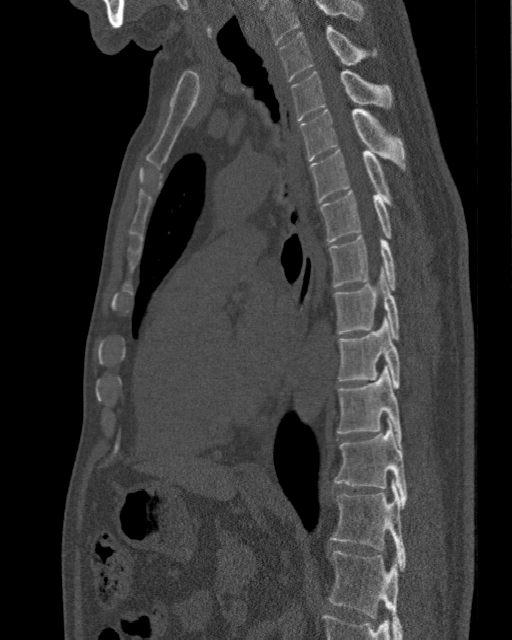

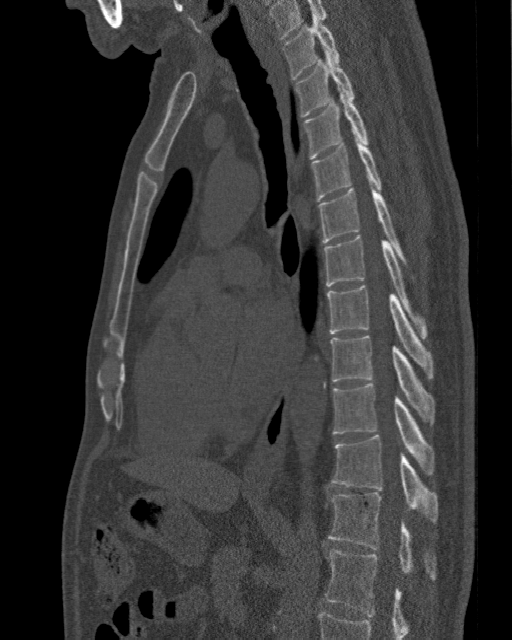

In [19]:
from IPython.display import Image, display
display(Image('/content/vBMD/Selected_Sagittal/Upper/Patient/SagUpper_sagittal_IM-0385_278.png'))
display(Image('/content/vBMD/Selected_Sagittal/Lower/Patient/SagLower_sagittal_IM-0385_266.png'))

# Step 4: Preprocessing for axial images by cropping and padding images to help inference

In [69]:
### Load Essential Packages ###
from PIL import Image
import numpy as np
import cv2
import os
import glob
from glob import iglob

### Crop Images to Size that Contains Vertebral Body and Pad Remaining Image to Retain Original Image Size ###
for filename in sorted(glob.glob('/content/vBMD/Selected_Axial/Patient/*.png')):
    original = np.asarray(Image.open(filename))
    cropped = original[240:450, 190:322]

    right = 190
    left = 190
    top = 240
    bottom = 62

    cropped = Image.fromarray(np.uint8(cropped))
    width, height = cropped.size
    new_width = width + right + left
    new_height = height + top + bottom
    result = Image.new(cropped.mode, (new_width, new_height), (0, 0, 0))
    result.paste(cropped, (left, top))

    result.save(filename)

# **Display New Cropped and Padded Images from Axial T1-T10**

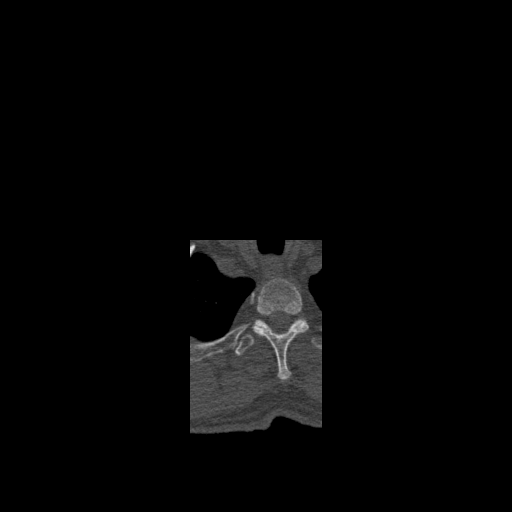

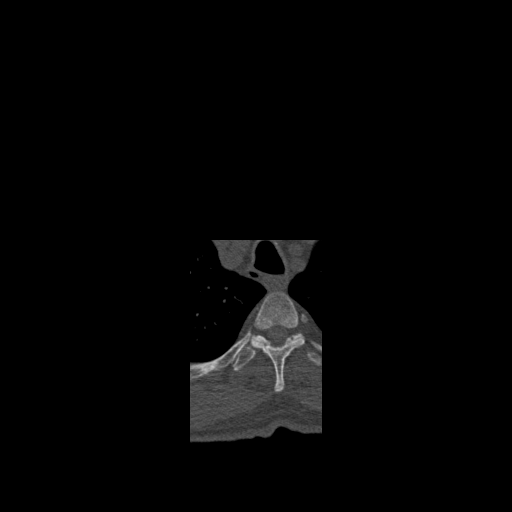

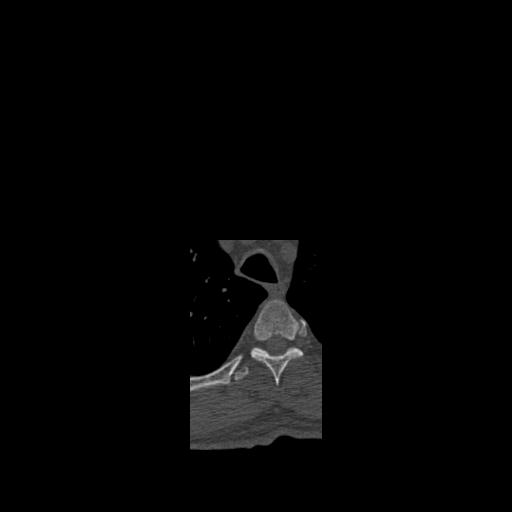

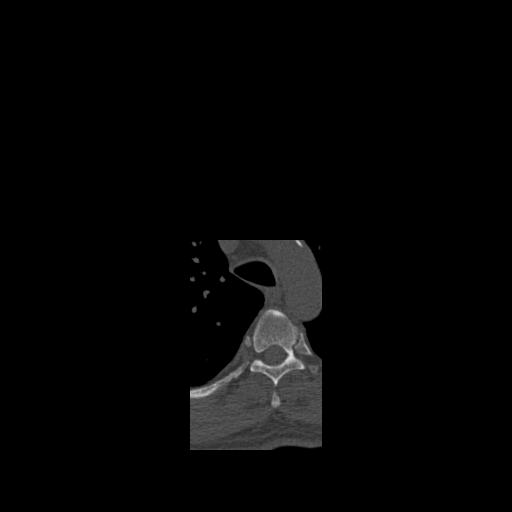

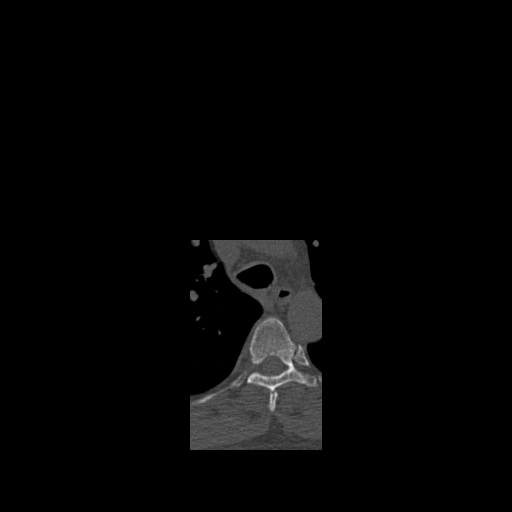

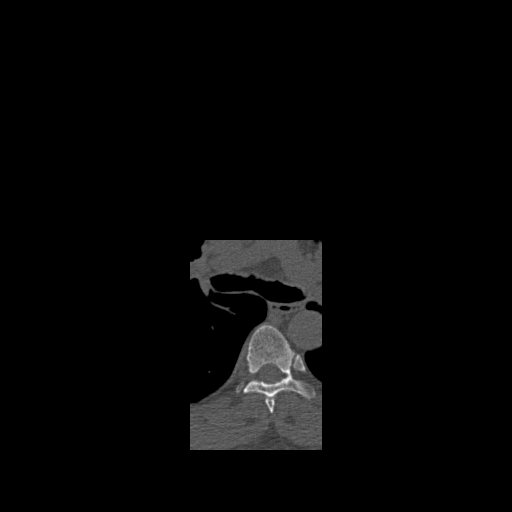

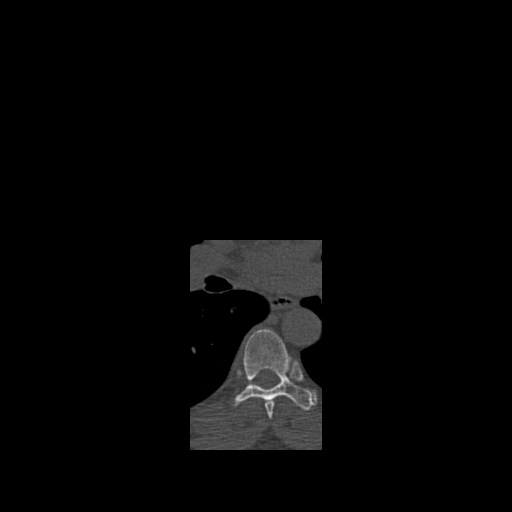

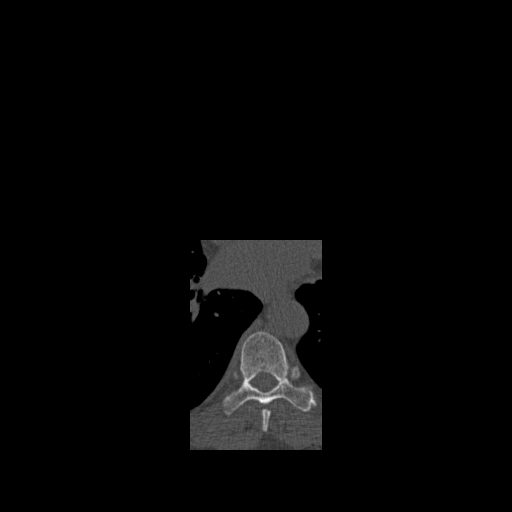

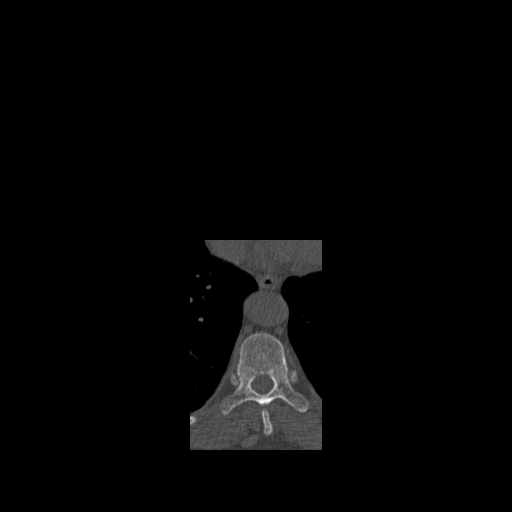

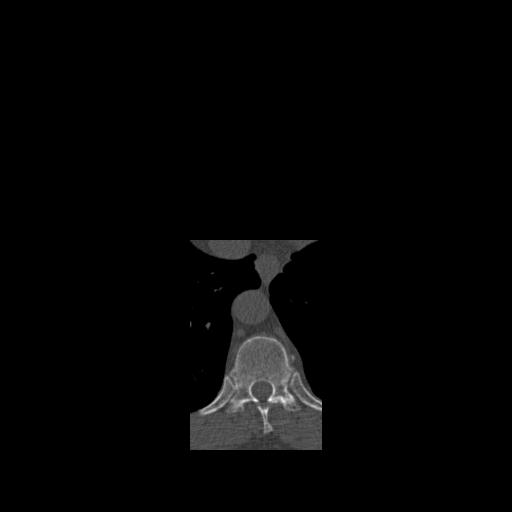

In [71]:
from IPython.display import Image, display
display(Image('/content/vBMD/Selected_Axial/Patient/T1_axial_IM-0385_520.png'))
display(Image('/content/vBMD/Selected_Axial/Patient/T2_axial_IM-0385_483.png'))
display(Image('/content/vBMD/Selected_Axial/Patient/T3_axial_IM-0385_452.png'))
display(Image('/content/vBMD/Selected_Axial/Patient/T4_axial_IM-0385_420.png'))
display(Image('/content/vBMD/Selected_Axial/Patient/T5_axial_IM-0385_381.png'))
display(Image('/content/vBMD/Selected_Axial/Patient/T6_axial_IM-0385_339.png'))
display(Image('/content/vBMD/Selected_Axial/Patient/T7_axial_IM-0385_297.png'))
display(Image('/content/vBMD/Selected_Axial/Patient/T8_axial_IM-0385_252.png'))
display(Image('/content/vBMD/Selected_Axial/Patient/T9_axial_IM-0385_208.png'))
display(Image('/content/vBMD/Selected_Axial/Patient/T10_axial_IM-0385_167.png'))

# G) Load dependencies for PixelLib and Mask R-CNN

In [58]:
!pip install tensorflow==2.5.3
!pip install keras==2.4.3
!pip install numpy==1.19.5
!pip install pillow==8.2.0
!pip install PyQt5==5.15.5
!pip install pixellib==0.7.1
!pip install scikit-image==0.18.0
!pip install protobuf==3.20.0

     |████████████████████████████████| 460.4 MB 24 kB/s 
     |████████████████████████████████| 462 kB 72.5 MB/s 
     |████████████████████████████████| 132 kB 75.7 MB/s 
     |████████████████████████████████| 65 kB 4.4 MB/s 
     |████████████████████████████████| 5.5 MB 58.3 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 65 kB 4.1 MB/s 
     |████████████████████████████████| 57 kB 5.9 MB/s 
     |████████████████████████████████| 14.9 MB 308 kB/s 
     |████████████████████████████████| 4.4 MB 49.5 MB/s 
     |████████████████████████████████| 4.0 MB 72.8 MB/s 
     |████████████████████████████████| 294 kB 67.1 MB/s 
     |████████████████████████████████| 1.2 MB 44.6 MB/s 
     |████████████████████████████████| 102 kB 8.2 MB/s 
     |████████████████████████████████| 226 kB 47.3 MB/s 
     |████████████████████████████████| 151 kB 57.8 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp38-cp38-linux_x86_64.whl size=

     |████████████████████████████████| 34.5 MB 14 kB/s 
     |████████████████████████████████| 736 kB 63.2 MB/s 
     |████████████████████████████████| 3.0 MB 22.4 MB/s 
     |████████████████████████████████| 8.3 MB 24.7 MB/s 
     |████████████████████████████████| 59.9 MB 77 kB/s 
  Attempting uninstall: PyQt5
    Found existing installation: PyQt5 5.15.10
    Uninstalling PyQt5-5.15.10:
      Successfully uninstalled PyQt5-5.15.10
     |████████████████████████████████| 430 kB 19.4 MB/s 
     |████████████████████████████████| 79 kB 7.1 MB/s 
     |████████████████████████████████| 50 kB 5.7 MB/s 
     |████████████████████████████████| 9.2 MB 47.5 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 3.6 MB 63.3 MB/s 
     |████████████████████████████████| 13.9 MB 68.8 MB/s 
     |████████████████████████████████| 840 kB 39.9 MB/s 
     |████████████████████████████████| 154 kB 60.2 MB/s 
     |████████████████████████████████| 1

     |████████████████████████████████| 30.2 MB 1.4 MB/s 
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.21.0
    Uninstalling scikit-image-0.21.0:
      Successfully uninstalled scikit-image-0.21.0
     |████████████████████████████████| 1.0 MB 21.6 MB/s 
ERROR: tensorboard 2.14.0 has requirement grpcio>=1.48.2, but you'll have grpcio 1.34.1 which is incompatible.
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.0
    Uninstalling protobuf-4.25.0:
      Successfully uninstalled protobuf-4.25.0


# H) Restart runtime to incorporate new packages

#Step 5: Create combined COCO annotation for manual segmentation JSON files and modify JSON files if needed (Not Shown Here)

# Step 6a: Custom semantic segmentation training/validation/evaluation in axial using PixelLib and Mask R-CNN for all remaining participants

In [9]:
### Load Essential Packages ###
import pixellib
from pixellib.instance import custom_segmentation

### Custom Segmentation of Axial Spine ###
segment_image = custom_segmentation()
segment_image.inferConfig(num_classes = 1, class_names= ["BG", "AXIAL"], detection_threshold = 0.95, network_backbone = "resnet50")
segment_image.load_model("/content/vBMD/COCO/Spine_Axial.h5")

# Step 6b: Axial inference and output of AI-driven semantic segmentation

In [10]:
### Load Essential Packages ###
import numpy as np
from PIL import Image
import cv2
import os

inputdir = '/content/vBMD/Selected_Axial/Patient/'
outdir = '/content/vBMD/Output/Axial/'
outdir1 = '/content/vBMD/Mask_Infer/Axial/Infer_Mask_'
outdir2 = '/content/vBMD/Mask_Infer/Axial/Inference_'

test_list = [ f for f in  os.listdir(inputdir)]

### Inference of Axial T1-T10 Images Based on PixelLib and Mask R-CNN  ###
try:
    for f in sorted (test_list):
        if f.endswith('.png'):
            segmask, output = segment_image.segmentImage(inputdir + f, extract_segmented_objects = False, mask_points_values = True, show_bboxes=False)
            class_list = segmask['class_ids'].tolist()
            class_str = ''.join(str(x) for x in class_list)
            a = [ [individualArray] for individualArray in segmask['masks'] ]

            cv2.imwrite(outdir + f, output)
            a1 = np.array(a)
            try:
                for i in a1.tolist():
                    mask1 = np.asarray(Image.open(inputdir + f))
                    mask11 =  mask1[:,:,:3]
                    img1 = cv2.fillPoly(mask1, np.array(i), color=(0, 0, 0))
                    maskB = Image.fromarray(mask11)
                for i in a1.tolist():
                    mask2 = np.asarray(Image.open(inputdir + f))
                    mask22 =  mask2[:,:,:3]
                    img2 = cv2.fillPoly(mask2, np.array(i), color=(255, 255, 255))
                    maskW = Image.fromarray(mask22)
                    Infer_Mask = np.subtract(maskW, maskB)
                    Inference = np.subtract(np.asarray(Image.open(inputdir + f))[:,:,:3], maskB)
                    cv2.imwrite(outdir1 + f, Infer_Mask)
                    cv2.imwrite(outdir2 + f, Inference)
            except Exception:
                pass
except TypeError:
    pass

2023-11-15 18:57:02.783347: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:690] Error in PredictCost() for the op: op: "CropAndResize" attr { key: "T" value { type: DT_FLOAT } } attr { key: "extrapolation_value" value { f: 0 } } attr { key: "method" value { s: "bilinear" } } inputs { dtype: DT_FLOAT shape { dim { size: -48 } dim { size: -206 } dim { size: -207 } dim { size: 256 } } } inputs { dtype: DT_FLOAT shape { dim { size: -19 } dim { size: 4 } } } inputs { dtype: DT_INT32 shape { dim { size: -19 } } } inputs { dtype: DT_INT32 shape { dim { size: 2 } } value { dtype: DT_INT32 tensor_shape { dim { size: 2 } } tensor_content: "\007\000\000\000\007\000\000\000" } } device { type: "CPU" vendor: "GenuineIntel" model: "111" frequency: 2199 num_cores: 2 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.99" } l1_cache_size: 32768 l2_cache_size: 262144 l3_cache_size: 57671680 memory_size: 26843

# **Display Images from Output Segmentation**

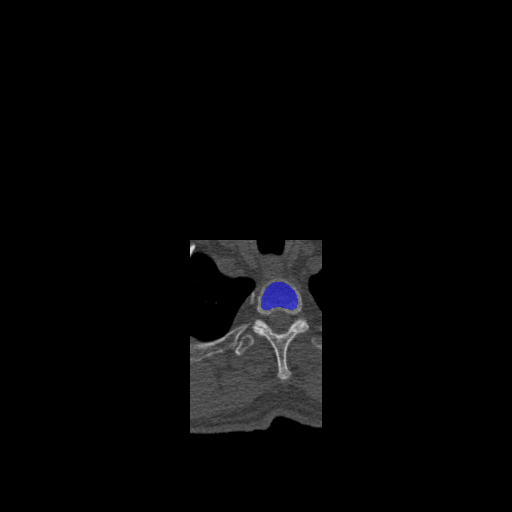

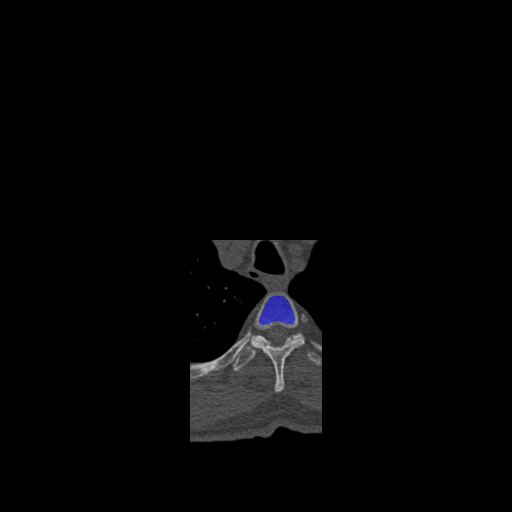

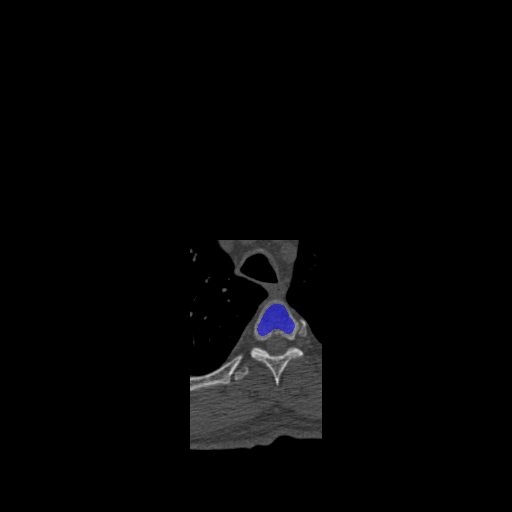

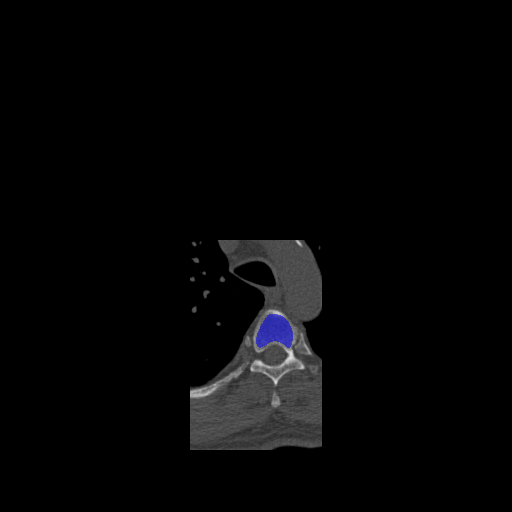

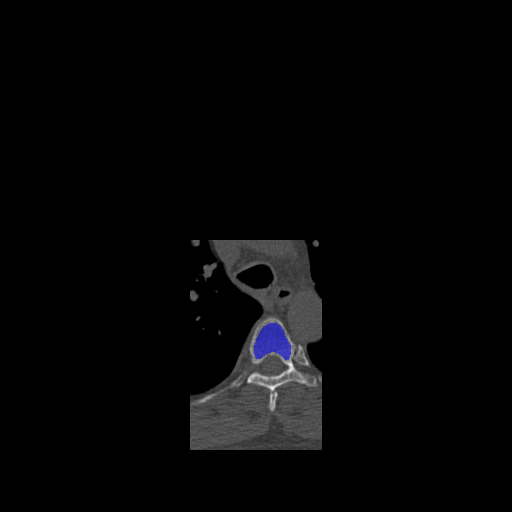

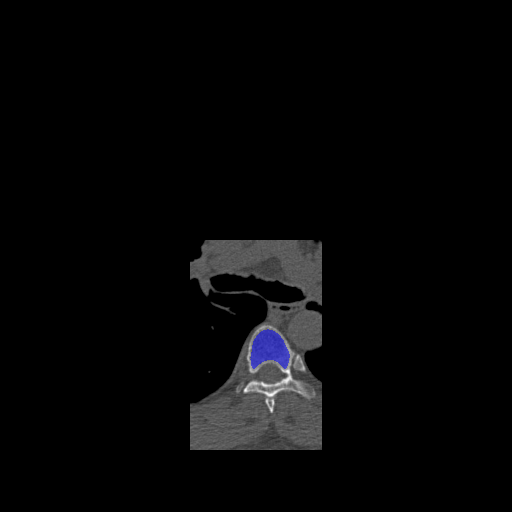

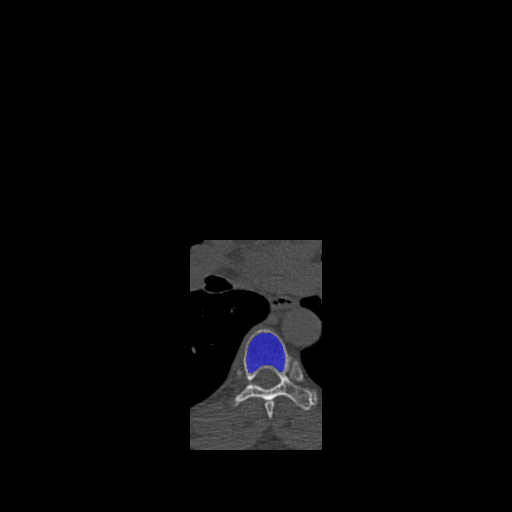

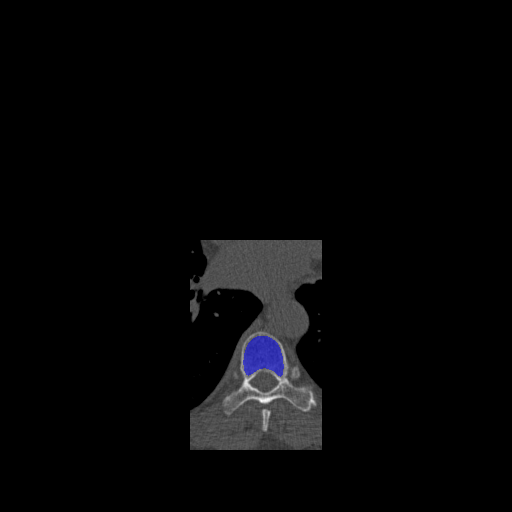

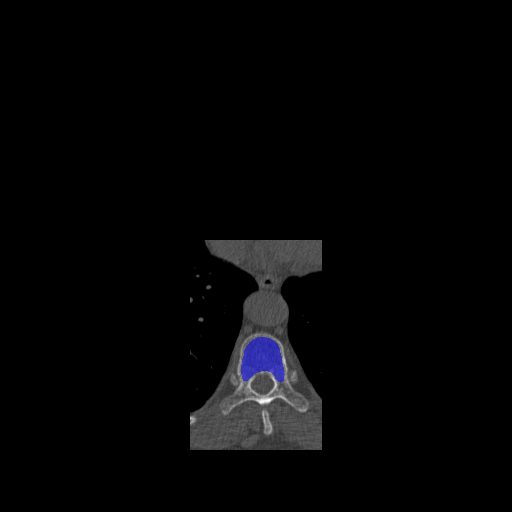

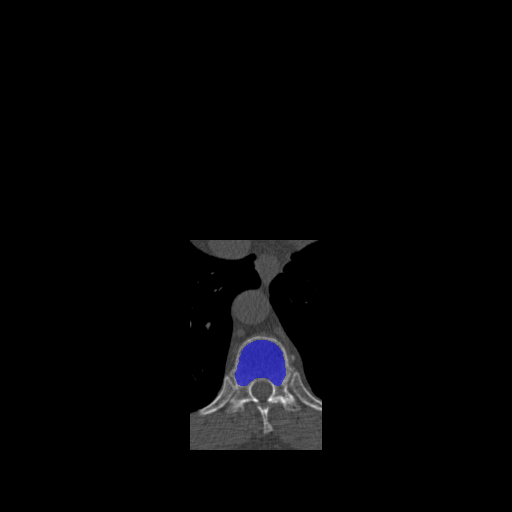

In [11]:
from IPython.display import Image, display
display(Image('/content/vBMD/Output/Axial/T1_axial_IM-0385_520.png'))
display(Image('/content/vBMD/Output/Axial/T2_axial_IM-0385_483.png'))
display(Image('/content/vBMD/Output/Axial/T3_axial_IM-0385_452.png'))
display(Image('/content/vBMD/Output/Axial/T4_axial_IM-0385_420.png'))
display(Image('/content/vBMD/Output/Axial/T5_axial_IM-0385_381.png'))
display(Image('/content/vBMD/Output/Axial/T6_axial_IM-0385_339.png'))
display(Image('/content/vBMD/Output/Axial/T7_axial_IM-0385_297.png'))
display(Image('/content/vBMD/Output/Axial/T8_axial_IM-0385_252.png'))
display(Image('/content/vBMD/Output/Axial/T9_axial_IM-0385_208.png'))
display(Image('/content/vBMD/Output/Axial/T10_axial_IM-0385_167.png'))

# Step 7a: Custom semantic segmentation training/validation/evaluation in upper sagittal (T1-T5) using PixelLib and Mask R-CNN for all remaining participants

In [14]:
### Load Essential Packages ###
import pixellib
from pixellib.instance import custom_segmentation

### Custom Segmentation of Upper Sagittal Spine (T1-T5) ###
segment_image = custom_segmentation()
segment_image.inferConfig(num_classes = 1, class_names= ["BG", "AXIAL"], detection_threshold = 0.95, network_backbone = "resnet50")
segment_image.load_model("/content/vBMD/COCO/Spine_Sagittal_Upper.h5")

# Step 7b: Sagittal upper inference and output of AI-driven semantic segmentation


In [21]:
### Load Essential Packages ###
import numpy as np
from PIL import Image
import cv2
import os
import itertools
import pandas as pd
import operator

inputdir = '/content/vBMD/Selected_Sagittal/Upper/Patient/'
outdir = '/content/vBMD/Output/Sagittal/'
outdir1 = '/content/vBMD/Mask_Infer/Sagittal/Infer_Mask_T1_'
outdir2 = '/content/vBMD/Mask_Infer/Sagittal/Inference_T1_'
outdir3 = '/content/vBMD/Mask_Infer/Sagittal/Infer_Mask_T2_'
outdir4 = '/content/vBMD/Mask_Infer/Sagittal/Inference_T2_'
outdir5 = '/content/vBMD/Mask_Infer/Sagittal/Infer_Mask_T3_'
outdir6 = '/content/vBMD/Mask_Infer/Sagittal/Inference_T3_'
outdir7 = '/content/vBMD/Mask_Infer/Sagittal/Infer_Mask_T4_'
outdir8 = '/content/vBMD/Mask_Infer/Sagittal/Inference_T4_'
outdir9 = '/content/vBMD/Mask_Infer/Sagittal/Infer_Mask_T5_'
outdir10 = '/content/vBMD/Mask_Infer/Sagittal/Inference_T5_'

test_list = [ f for f in  os.listdir(inputdir)]

### Inference of T1, T2, T3, T4, T5 Images Based on Mask R-CNN Model ###
for f in sorted (test_list):
    if f.endswith('.png'):
        try:
            ### Since Mask R-CNN will Perform Instance Segmentation of the Sagittal Vertrbea, All Instances must be captured ###
            segmask, output = segment_image.segmentImage(inputdir + f, extract_segmented_objects = False, mask_points_values = True, show_bboxes=False)
            class_list = segmask['class_ids'].tolist()
            class_str = ''.join(str(x) for x in class_list)
            a = []
            b = []
            c = []
            d = []
            e = []
            g = []
            h = []
            i = []
            j = []
            k = []

            ### Explaination of How to Assign Each ROI to a Class Based on Number of ROIs Identified ###
            if len(class_str) == 1:
                a = [ [individualArray] for individualArray in segmask['masks'] ]
            elif len(class_str) == 2:
                a,b = [ [individualArray] for individualArray in segmask['masks'] ]
            elif len(class_str) == 3:
                a,b,c = [ [individualArray] for individualArray in segmask['masks'] ]
            elif len(class_str) == 4:
                a,b,c,d = [ [individualArray] for individualArray in segmask['masks'] ]
            elif len(class_str) == 5:
                a,b,c,d,e = [ [individualArray] for individualArray in segmask['masks'] ]
            elif len(class_str) == 6:
                a,b,c,d,e,g = [ [individualArray] for individualArray in segmask['masks'] ]
            elif len(class_str) == 7:
                a,b,c,d,e,g,h = [ [individualArray] for individualArray in segmask['masks'] ]
            elif len(class_str) == 8:
                a,b,c,d,e,g,h,i = [ [individualArray] for individualArray in segmask['masks'] ]
            elif len(class_str) == 9:
                a,b,c,d,e,g,h,i,j = [ [individualArray] for individualArray in segmask['masks'] ]
            else:
                a,b,c,d,e,g,h,i,j,l = [ [individualArray] for individualArray in segmask['masks'] ]

            ### Finding the Position of Each ROI in the 2D Image Space ###
            try:
                anest = [list(itertools.chain(*sub)) for sub in a]
                anest2 = [list(itertools.chain(*sub)) for sub in anest]
                astr = str(anest2)[2:-2]
                alist = astr.split(",")
                alist2 = [eval(i) for i in alist]
                adf = pd.DataFrame(alist2[1::2])
                min1 = int(adf.min())
            except:
                pass
            try:
                bnest = [list(itertools.chain(*sub)) for sub in b]
                bnest2 = [list(itertools.chain(*sub)) for sub in bnest]
                bstr = str(bnest2)[2:-2]
                blist = bstr.split(",")
                blist2 = [eval(i) for i in blist]
                bdf = pd.DataFrame(blist2[1::2])
                min2 = int(bdf.min())
            except:
                pass
            try:
                cnest = [list(itertools.chain(*sub)) for sub in c]
                cnest2 = [list(itertools.chain(*sub)) for sub in cnest]
                cstr = str(cnest2)[2:-2]
                clist = cstr.split(",")
                clist2 = [eval(i) for i in clist]
                cdf = pd.DataFrame(clist2[1::2])
                min3 = int(cdf.min())
            except:
                pass
            try:
                dnest = [list(itertools.chain(*sub)) for sub in d]
                dnest2 = [list(itertools.chain(*sub)) for sub in dnest]
                dstr = str(dnest2)[2:-2]
                dlist = dstr.split(",")
                dlist2 = [eval(i) for i in dlist]
                ddf = pd.DataFrame(dlist2[1::2])
                min4 = int(ddf.min())
            except:
                pass
            try:
                enest = [list(itertools.chain(*sub)) for sub in e]
                enest2 = [list(itertools.chain(*sub)) for sub in enest]
                estr = str(enest2)[2:-2]
                elist = estr.split(",")
                elist2 = [eval(i) for i in elist]
                edf = pd.DataFrame(elist2[1::2])
                min5 = int(edf.min())
            except:
                pass
            try:
                gnest = [list(itertools.chain(*sub)) for sub in g]
                gnest2 = [list(itertools.chain(*sub)) for sub in gnest]
                gstr = str(gnest2)[2:-2]
                glist = gstr.split(",")
                glist2 = [eval(i) for i in glist]
                gdf = pd.DataFrame(glist2[1::2])
                min6 = int(gdf.min())
            except:
                pass
            try:
                hnest = [list(itertools.chain(*sub)) for sub in h]
                hnest2 = [list(itertools.chain(*sub)) for sub in hnest]
                hstr = str(hnest2)[2:-2]
                hlist = hstr.split(",")
                hlist2 = [eval(i) for i in hlist]
                hdf = pd.DataFrame(hlist2[1::2])
                min7 = int(hdf.min())
            except:
                pass
            try:
                inest = [list(itertools.chain(*sub)) for sub in i]
                inest2 = [list(itertools.chain(*sub)) for sub in inest]
                istr = str(inest2)[2:-2]
                ilist = istr.split(",")
                ilist2 = [eval(i) for i in ilist]
                idf = pd.DataFrame(ilist2[1::2])
                min8 = int(idf.min())
            except:
                pass
            try:
                jnest = [list(itertools.chain(*sub)) for sub in j]
                jnest2 = [list(itertools.chain(*sub)) for sub in jnest]
                jstr = str(jnest2)[2:-2]
                jlist = jstr.split(",")
                jlist2 = [eval(i) for i in jlist]
                jdf = pd.DataFrame(jlist2[1::2])
                min9 = int(jdf.min())
            except:
                pass
            try:
                knest = [list(itertools.chain(*sub)) for sub in k]
                knest2 = [list(itertools.chain(*sub)) for sub in knest]
                kstr = str(knest2)[2:-2]
                klist = kstr.split(",")
                klist2 = [eval(i) for i in klist]
                kdf = pd.DataFrame(klist2[1::2])
                min10 = int(kdf.min())
            except:
                pass

            cv2.imwrite(outdir + f, output)

            ### Creating a Dictionary Output for All ROIs to Rank the ROIs by Location on the Image ###
            myDict = {}
            if len(class_str) == 1:
                myDict[min1] = a
                e1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[0,1], dtype=object)
            elif len(class_str) == 2:
                myDict[min1] = a
                myDict[min2] = b
                d1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[0,1], dtype=object)
                e1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[1,1], dtype=object)
            elif len(class_str) == 3:
                myDict[min1] = a
                myDict[min2] = b
                myDict[min3] = c
                c1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[0,1], dtype=object)
                d1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[1,1], dtype=object)
                e1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[2,1], dtype=object)
            elif len(class_str) == 4:
                myDict[min1] = a
                myDict[min2] = b
                myDict[min3] = c
                myDict[min4] = d
                b1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[0,1], dtype=object)
                c1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[1,1], dtype=object)
                d1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[2,1], dtype=object)
                e1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[3,1], dtype=object)
            elif len(class_str) == 5:
                myDict[min1] = a
                myDict[min2] = b
                myDict[min3] = c
                myDict[min4] = d
                myDict[min5] = e
                a1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[0,1], dtype=object)
                b1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[1,1], dtype=object)
                c1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[2,1], dtype=object)
                d1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[3,1], dtype=object)
                e1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[4,1], dtype=object)
            elif len(class_str) == 6:
                myDict[min1] = a
                myDict[min2] = b
                myDict[min3] = c
                myDict[min4] = d
                myDict[min5] = e
                myDict[min6] = g
                a1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[1,1], dtype=object)
                b1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[2,1], dtype=object)
                c1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[3,1], dtype=object)
                d1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[4,1], dtype=object)
                e1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[5,1], dtype=object)
            elif len(class_str) == 7:
                myDict[min1] = a
                myDict[min2] = b
                myDict[min3] = c
                myDict[min4] = d
                myDict[min5] = e
                myDict[min6] = g
                myDict[min7] = h
                a1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[1,1], dtype=object)
                b1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[2,1], dtype=object)
                c1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[3,1], dtype=object)
                d1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[4,1], dtype=object)
                e1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[5,1], dtype=object)
            elif len(class_str) == 8:
                myDict[min1] = a
                myDict[min2] = b
                myDict[min3] = c
                myDict[min4] = d
                myDict[min5] = e
                myDict[min6] = g
                myDict[min7] = h
                myDict[min8] = i
                a1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[1,1], dtype=object)
                b1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[2,1], dtype=object)
                c1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[3,1], dtype=object)
                d1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[4,1], dtype=object)
                e1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[5,1], dtype=object)
            elif len(class_str) == 9:
                myDict[min1] = a
                myDict[min2] = b
                myDict[min3] = c
                myDict[min4] = d
                myDict[min5] = e
                myDict[min6] = g
                myDict[min7] = h
                myDict[min8] = i
                myDict[min9] = j
                a1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[1,1], dtype=object)
                b1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[2,1], dtype=object)
                c1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[3,1], dtype=object)
                d1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[4,1], dtype=object)
                e1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[5,1], dtype=object)
            else:
                myDict[min1] = a
                myDict[min2] = b
                myDict[min3] = c
                myDict[min4] = d
                myDict[min5] = e
                myDict[min6] = g
                myDict[min7] = h
                myDict[min8] = i
                myDict[min9] = j
                myDict[min10] = k
                a1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[1,1], dtype=object)
                b1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[2,1], dtype=object)
                c1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[3,1], dtype=object)
                d1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[4,1], dtype=object)
                e1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[5,1], dtype=object)

            ### Assigning the 5 ROIs meeting the criteria for T5-T10 ###
            try:
                for i in a1.tolist():
                    mask1 = np.asarray(Image.open(inputdir + f))
                    mask11 =  mask1[:,:,:3]
                    img1 = cv2.fillPoly(mask1, np.array(i), color=(0, 0, 0))
                    maskB = Image.fromarray(mask11)
                for i in a1.tolist():
                    mask2 = np.asarray(Image.open(inputdir + f))
                    mask22 =  mask2[:,:,:3]
                    img2 = cv2.fillPoly(mask2, np.array(i), color=(255, 255, 255))
                    maskW = Image.fromarray(mask22)
                    T1_Mask = np.subtract(maskW, maskB)
                    T1 = np.subtract(np.asarray(Image.open(inputdir + f))[:,:,:3], maskB)
                    cv2.imwrite(outdir1 + f, T1_Mask)
                    cv2.imwrite(outdir2 + f, T1)
                for i in b1.tolist():
                    mask3 = np.asarray(Image.open(inputdir + f))
                    mask33 =  mask3[:,:,:3]
                    img3 = cv2.fillPoly(mask3, np.array(i), color=(0, 0, 0))
                    maskB2 = Image.fromarray(mask33)
                for i in b1.tolist():
                    mask4 = np.asarray(Image.open(inputdir + f))
                    mask44 =  mask4[:,:,:3]
                    img4 = cv2.fillPoly(mask4, np.array(i), color=(255, 255, 255))
                    maskW2 = Image.fromarray(mask44)
                    T2_Mask = np.subtract(maskW2, maskB2)
                    T2 = np.subtract(np.asarray(Image.open(inputdir + f))[:,:,:3], maskB2)
                    cv2.imwrite(outdir3 + f, T2_Mask)
                    cv2.imwrite(outdir4 + f, T2)
                for i in c1.tolist():
                    mask5 = np.asarray(Image.open(inputdir + f))
                    mask55 =  mask5[:,:,:3]
                    img5 = cv2.fillPoly(mask5, np.array(i), color=(0, 0, 0))
                    maskB3 = Image.fromarray(mask55)
                for i in c1.tolist():
                    mask6 = np.asarray(Image.open(inputdir + f))
                    mask66 =  mask6[:,:,:3]
                    img6 = cv2.fillPoly(mask6, np.array(i), color=(255, 255, 255))
                    maskW3 = Image.fromarray(mask66)
                    T3_Mask = np.subtract(maskW3, maskB3)
                    T3 = np.subtract(np.asarray(Image.open(inputdir + f))[:,:,:3], maskB3)
                    cv2.imwrite(outdir5 + f, T3_Mask)
                    cv2.imwrite(outdir6 + f, T3)
                for i in d1.tolist():
                    mask7 = np.asarray(Image.open(inputdir + f))
                    mask77 =  mask7[:,:,:3]
                    img7 = cv2.fillPoly(mask7, np.array(i), color=(0, 0, 0))
                    maskB4 = Image.fromarray(mask77)
                for i in d1.tolist():
                    mask8 = np.asarray(Image.open(inputdir + f))
                    mask88 =  mask8[:,:,:3]
                    img8 = cv2.fillPoly(mask8, np.array(i), color=(255, 255, 255))
                    maskW4 = Image.fromarray(mask88)
                    T4_Mask = np.subtract(maskW4, maskB4)
                    T4 = np.subtract(np.asarray(Image.open(inputdir + f))[:,:,:3], maskB4)
                    cv2.imwrite(outdir7 + f, T4_Mask)
                    cv2.imwrite(outdir8 + f, T4)
                for i in e1.tolist():
                    mask9 = np.asarray(Image.open(inputdir + f))
                    mask99 =  mask9[:,:,:3]
                    img9 = cv2.fillPoly(mask9, np.array(i), color=(0, 0, 0))
                    maskB5 = Image.fromarray(mask99)
                for i in e1.tolist():
                    mask10 = np.asarray(Image.open(inputdir + f))
                    mask1010 =  mask10[:,:,:3]
                    img10 = cv2.fillPoly(mask10, np.array(i), color=(255, 255, 255))
                    maskW5 = Image.fromarray(mask1010)
                    T5_Mask = np.subtract(maskW5, maskB5)
                    T5 = np.subtract(np.asarray(Image.open(inputdir + f))[:,:,:3], maskB5)
                    cv2.imwrite(outdir9 + f, T5_Mask)
                    cv2.imwrite(outdir10 + f, T5)
            except:
                pass
        except:
            pass

# **Display Images from Output Segmentation**

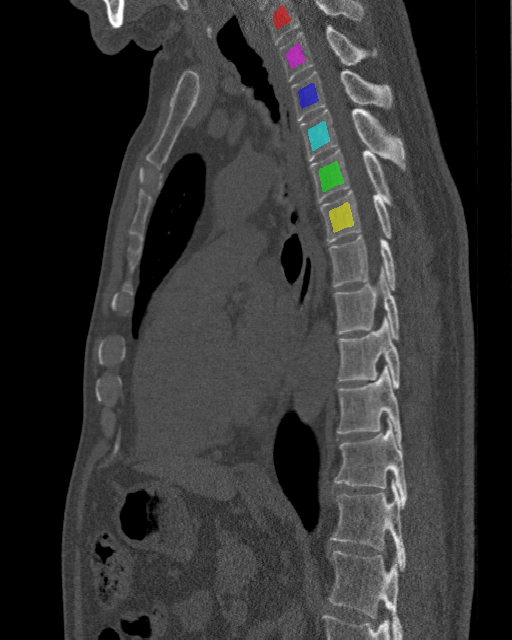

In [24]:
from IPython.display import Image, display
display(Image('/content/vBMD/Output/Sagittal/SagUpper_sagittal_IM-0385_278.png'))

# Step 8a: Custom semantic segmentation training/validation/evaluation in lower sagittal (T6-T10) using PixelLib and Mask R-CNN for all remaining participants

In [22]:
### Load Essential Packages ###
import pixellib
from pixellib.instance import custom_segmentation

### Custom Segmentation of Lower Sagittal Spine (T6-T10) ###
segment_image = custom_segmentation()
segment_image.inferConfig(num_classes = 1, class_names= ["BG", "AXIAL"], detection_threshold = 0.95, network_backbone = "resnet50")
segment_image.load_model("/content/vBMD/COCO/Spine_Sagittal_Lower.h5")

# Step 8b: Sagittal lower inference and output of AI-driven semantic segmentation

In [23]:
### Load Essential Packages ###
import numpy as np
from PIL import Image
import cv2
import os
import itertools
import pandas as pd
import operator

inputdir = '/content/vBMD/Selected_Sagittal/Lower/Patient/'
outdir = '/content/vBMD/Output/Sagittal/'
outdir1 = '/content/vBMD/Mask_Infer/Sagittal/Infer_Mask_T6_'
outdir2 = '/content/vBMD/Mask_Infer/Sagittal/Inference_T6_'
outdir3 = '/content/vBMD/Mask_Infer/Sagittal/Infer_Mask_T7_'
outdir4 = '/content/vBMD/Mask_Infer/Sagittal/Inference_T7_'
outdir5 = '/content/vBMD/Mask_Infer/Sagittal/Infer_Mask_T8_'
outdir6 = '/content/vBMD/Mask_Infer/Sagittal/Inference_T8_'
outdir7 = '/content/vBMD/Mask_Infer/Sagittal/Infer_Mask_T9_'
outdir8 = '/content/vBMD/Mask_Infer/Sagittal/Inference_T9_'
outdir9 = '/content/vBMD/Mask_Infer/Sagittal/Infer_Mask_T10_'
outdir10 = '/content/vBMD/Mask_Infer/Sagittal/Inference_T10_'

test_list = [ f for f in  os.listdir(inputdir)]

### Inference of T6, T7, T8, T9, T10 Images Based on Mask R-CNN Model ###
for f in sorted (test_list):
    if f.endswith('.png'):
        try:
            ### Since Mask R-CNN will Perform Instance Segmentation of the Sagittal Vertrbea, All Instances must be captured ###
            segmask, output = segment_image.segmentImage(inputdir + f, extract_segmented_objects = False, mask_points_values = True, show_bboxes=False)
            class_list = segmask['class_ids'].tolist()
            class_str = ''.join(str(x) for x in class_list)
            a = []
            b = []
            c = []
            d = []
            e = []
            g = []
            h = []
            i = []
            j = []
            k = []

            ### Explaination of How to Assign Each ROI to a Class Based on Number of ROIs Identified ###
            if len(class_str) == 1:
                a = [ [individualArray] for individualArray in segmask['masks'] ]
            elif len(class_str) == 2:
                a,b = [ [individualArray] for individualArray in segmask['masks'] ]
            elif len(class_str) == 3:
                a,b,c = [ [individualArray] for individualArray in segmask['masks'] ]
            elif len(class_str) == 4:
                a,b,c,d = [ [individualArray] for individualArray in segmask['masks'] ]
            elif len(class_str) == 5:
                a,b,c,d,e = [ [individualArray] for individualArray in segmask['masks'] ]
            elif len(class_str) == 6:
                a,b,c,d,e,g = [ [individualArray] for individualArray in segmask['masks'] ]
            elif len(class_str) == 7:
                a,b,c,d,e,g,h = [ [individualArray] for individualArray in segmask['masks'] ]
            elif len(class_str) == 8:
                a,b,c,d,e,g,h,i = [ [individualArray] for individualArray in segmask['masks'] ]
            elif len(class_str) == 9:
                a,b,c,d,e,g,h,i,j = [ [individualArray] for individualArray in segmask['masks'] ]
            else:
                a,b,c,d,e,g,h,i,j,l = [ [individualArray] for individualArray in segmask['masks'] ]

            ### Finding the Position of Each ROI in the 2D Image Space ###
            try:
                anest = [list(itertools.chain(*sub)) for sub in a]
                anest2 = [list(itertools.chain(*sub)) for sub in anest]
                astr = str(anest2)[2:-2]
                alist = astr.split(",")
                alist2 = [eval(i) for i in alist]
                adf = pd.DataFrame(alist2[1::2])
                min1 = int(adf.min())
            except:
                pass
            try:
                bnest = [list(itertools.chain(*sub)) for sub in b]
                bnest2 = [list(itertools.chain(*sub)) for sub in bnest]
                bstr = str(bnest2)[2:-2]
                blist = bstr.split(",")
                blist2 = [eval(i) for i in blist]
                bdf = pd.DataFrame(blist2[1::2])
                min2 = int(bdf.min())
            except:
                pass
            try:
                cnest = [list(itertools.chain(*sub)) for sub in c]
                cnest2 = [list(itertools.chain(*sub)) for sub in cnest]
                cstr = str(cnest2)[2:-2]
                clist = cstr.split(",")
                clist2 = [eval(i) for i in clist]
                cdf = pd.DataFrame(clist2[1::2])
                min3 = int(cdf.min())
            except:
                pass
            try:
                dnest = [list(itertools.chain(*sub)) for sub in d]
                dnest2 = [list(itertools.chain(*sub)) for sub in dnest]
                dstr = str(dnest2)[2:-2]
                dlist = dstr.split(",")
                dlist2 = [eval(i) for i in dlist]
                ddf = pd.DataFrame(dlist2[1::2])
                min4 = int(ddf.min())
            except:
                pass
            try:
                enest = [list(itertools.chain(*sub)) for sub in e]
                enest2 = [list(itertools.chain(*sub)) for sub in enest]
                estr = str(enest2)[2:-2]
                elist = estr.split(",")
                elist2 = [eval(i) for i in elist]
                edf = pd.DataFrame(elist2[1::2])
                min5 = int(edf.min())
            except:
                pass
            try:
                gnest = [list(itertools.chain(*sub)) for sub in g]
                gnest2 = [list(itertools.chain(*sub)) for sub in gnest]
                gstr = str(gnest2)[2:-2]
                glist = gstr.split(",")
                glist2 = [eval(i) for i in glist]
                gdf = pd.DataFrame(glist2[1::2])
                min6 = int(gdf.min())
            except:
                pass
            try:
                hnest = [list(itertools.chain(*sub)) for sub in h]
                hnest2 = [list(itertools.chain(*sub)) for sub in hnest]
                hstr = str(hnest2)[2:-2]
                hlist = hstr.split(",")
                hlist2 = [eval(i) for i in hlist]
                hdf = pd.DataFrame(hlist2[1::2])
                min7 = int(hdf.min())
            except:
                pass
            try:
                inest = [list(itertools.chain(*sub)) for sub in i]
                inest2 = [list(itertools.chain(*sub)) for sub in inest]
                istr = str(inest2)[2:-2]
                ilist = istr.split(",")
                ilist2 = [eval(i) for i in ilist]
                idf = pd.DataFrame(ilist2[1::2])
                min8 = int(idf.min())
            except:
                pass
            try:
                jnest = [list(itertools.chain(*sub)) for sub in j]
                jnest2 = [list(itertools.chain(*sub)) for sub in jnest]
                jstr = str(jnest2)[2:-2]
                jlist = jstr.split(",")
                jlist2 = [eval(i) for i in jlist]
                jdf = pd.DataFrame(jlist2[1::2])
                min9 = int(jdf.min())
            except:
                pass
            try:
                knest = [list(itertools.chain(*sub)) for sub in k]
                knest2 = [list(itertools.chain(*sub)) for sub in knest]
                kstr = str(knest2)[2:-2]
                klist = kstr.split(",")
                klist2 = [eval(i) for i in klist]
                kdf = pd.DataFrame(klist2[1::2])
                min10 = int(kdf.min())
            except:
                pass

            cv2.imwrite(outdir + f, output)

            ### Creating a Dictionary Output for All ROIs to Rank the ROIs by Location on the Image ###
            myDict = {}
            if len(class_str) == 1:
                myDict[min1] = a
                a1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[0,1], dtype=object)
            elif len(class_str) == 2:
                myDict[min1] = a
                myDict[min2] = b
                a1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[0,1], dtype=object)
                b1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[1,1], dtype=object)
            elif len(class_str) == 3:
                myDict[min1] = a
                myDict[min2] = b
                myDict[min3] = c
                a1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[0,1], dtype=object)
                b1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[1,1], dtype=object)
                c1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[2,1], dtype=object)
            elif len(class_str) == 4:
                myDict[min1] = a
                myDict[min2] = b
                myDict[min3] = c
                myDict[min4] = d
                a1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[0,1], dtype=object)
                b1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[1,1], dtype=object)
                c1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[2,1], dtype=object)
                d1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[3,1], dtype=object)
            elif len(class_str) == 5:
                myDict[min1] = a
                myDict[min2] = b
                myDict[min3] = c
                myDict[min4] = d
                myDict[min5] = e
                a1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[0,1], dtype=object)
                b1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[1,1], dtype=object)
                c1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[2,1], dtype=object)
                d1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[3,1], dtype=object)
                e1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[4,1], dtype=object)
            elif len(class_str) == 6:
                myDict[min1] = a
                myDict[min2] = b
                myDict[min3] = c
                myDict[min4] = d
                myDict[min5] = e
                myDict[min6] = g
                a1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[1,1], dtype=object)
                b1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[2,1], dtype=object)
                c1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[3,1], dtype=object)
                d1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[4,1], dtype=object)
                e1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[5,1], dtype=object)
            elif len(class_str) == 7:
                myDict[min1] = a
                myDict[min2] = b
                myDict[min3] = c
                myDict[min4] = d
                myDict[min5] = e
                myDict[min6] = g
                myDict[min7] = h
                a1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[1,1], dtype=object)
                b1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[2,1], dtype=object)
                c1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[3,1], dtype=object)
                d1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[4,1], dtype=object)
                e1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[5,1], dtype=object)
            elif len(class_str) == 8:
                myDict[min1] = a
                myDict[min2] = b
                myDict[min3] = c
                myDict[min4] = d
                myDict[min5] = e
                myDict[min6] = g
                myDict[min7] = h
                myDict[min8] = i
                a1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[1,1], dtype=object)
                b1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[2,1], dtype=object)
                c1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[3,1], dtype=object)
                d1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[4,1], dtype=object)
                e1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[5,1], dtype=object)
            elif len(class_str) == 9:
                myDict[min1] = a
                myDict[min2] = b
                myDict[min3] = c
                myDict[min4] = d
                myDict[min5] = e
                myDict[min6] = g
                myDict[min7] = h
                myDict[min8] = i
                myDict[min9] = j
                a1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[1,1], dtype=object)
                b1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[2,1], dtype=object)
                c1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[3,1], dtype=object)
                d1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[4,1], dtype=object)
                e1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[5,1], dtype=object)
            else:
                myDict[min1] = a
                myDict[min2] = b
                myDict[min3] = c
                myDict[min4] = d
                myDict[min5] = e
                myDict[min6] = g
                myDict[min7] = h
                myDict[min8] = i
                myDict[min9] = j
                myDict[min10] = k
                a1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[1,1], dtype=object)
                b1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[2,1], dtype=object)
                c1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[3,1], dtype=object)
                d1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[4,1], dtype=object)
                e1 = np.array((np.array((sorted(myDict.items(), key=operator.itemgetter(0))), dtype=object))[5,1], dtype=object)

            ### Assigning the 5 ROIs meeting the criteria for T5-T10 ###
            try:
                for i in a1.tolist():
                    mask1 = np.asarray(Image.open(inputdir + f))
                    mask11 =  mask1[:,:,:3]
                    img1 = cv2.fillPoly(mask1, np.array(i), color=(0, 0, 0))
                    maskB = Image.fromarray(mask11)
                for i in a1.tolist():
                    mask2 = np.asarray(Image.open(inputdir + f))
                    mask22 =  mask2[:,:,:3]
                    img2 = cv2.fillPoly(mask2, np.array(i), color=(255, 255, 255))
                    maskW = Image.fromarray(mask22)
                    T6_Mask = np.subtract(maskW, maskB)
                    T6 = np.subtract(np.asarray(Image.open(inputdir + f))[:,:,:3], maskB)
                    cv2.imwrite(outdir1 + f, T6_Mask)
                    cv2.imwrite(outdir2 + f, T6)
                for i in b1.tolist():
                    mask3 = np.asarray(Image.open(inputdir + f))
                    mask33 =  mask3[:,:,:3]
                    img3 = cv2.fillPoly(mask3, np.array(i), color=(0, 0, 0))
                    maskB2 = Image.fromarray(mask33)
                for i in b1.tolist():
                    mask4 = np.asarray(Image.open(inputdir + f))
                    mask44 =  mask4[:,:,:3]
                    img4 = cv2.fillPoly(mask4, np.array(i), color=(255, 255, 255))
                    maskW2 = Image.fromarray(mask44)
                    T7_Mask = np.subtract(maskW2, maskB2)
                    T7 = np.subtract(np.asarray(Image.open(inputdir + f))[:,:,:3], maskB2)
                    cv2.imwrite(outdir3 + f, T7_Mask)
                    cv2.imwrite(outdir4 + f, T7)
                for i in c1.tolist():
                    mask5 = np.asarray(Image.open(inputdir + f))
                    mask55 =  mask5[:,:,:3]
                    img5 = cv2.fillPoly(mask5, np.array(i), color=(0, 0, 0))
                    maskB3 = Image.fromarray(mask55)
                for i in c1.tolist():
                    mask6 = np.asarray(Image.open(inputdir + f))
                    mask66 =  mask6[:,:,:3]
                    img6 = cv2.fillPoly(mask6, np.array(i), color=(255, 255, 255))
                    maskW3 = Image.fromarray(mask66)
                    T8_Mask = np.subtract(maskW3, maskB3)
                    T8 = np.subtract(np.asarray(Image.open(inputdir + f))[:,:,:3], maskB3)
                    cv2.imwrite(outdir5 + f, T8_Mask)
                    cv2.imwrite(outdir6 + f, T8)
                for i in d1.tolist():
                    mask7 = np.asarray(Image.open(inputdir + f))
                    mask77 =  mask7[:,:,:3]
                    img7 = cv2.fillPoly(mask7, np.array(i), color=(0, 0, 0))
                    maskB4 = Image.fromarray(mask77)
                for i in d1.tolist():
                    mask8 = np.asarray(Image.open(inputdir + f))
                    mask88 =  mask8[:,:,:3]
                    img8 = cv2.fillPoly(mask8, np.array(i), color=(255, 255, 255))
                    maskW4 = Image.fromarray(mask88)
                    T9_Mask = np.subtract(maskW4, maskB4)
                    T9 = np.subtract(np.asarray(Image.open(inputdir + f))[:,:,:3], maskB4)
                    cv2.imwrite(outdir7 + f, T9_Mask)
                    cv2.imwrite(outdir8 + f, T9)
                for i in e1.tolist():
                    mask9 = np.asarray(Image.open(inputdir + f))
                    mask99 =  mask9[:,:,:3]
                    img9 = cv2.fillPoly(mask9, np.array(i), color=(0, 0, 0))
                    maskB5 = Image.fromarray(mask99)
                for i in e1.tolist():
                    mask10 = np.asarray(Image.open(inputdir + f))
                    mask1010 =  mask10[:,:,:3]
                    img10 = cv2.fillPoly(mask10, np.array(i), color=(255, 255, 255))
                    maskW5 = Image.fromarray(mask1010)
                    T10_Mask = np.subtract(maskW5, maskB5)
                    T10 = np.subtract(np.asarray(Image.open(inputdir + f))[:,:,:3], maskB5)
                    cv2.imwrite(outdir9 + f, T10_Mask)
                    cv2.imwrite(outdir10 + f, T10)
            except:
                pass
        except:
            pass

2023-11-15 19:28:32.391585: W tensorflow/core/grappler/costs/op_level_cost_estimator.cc:690] Error in PredictCost() for the op: op: "CropAndResize" attr { key: "T" value { type: DT_FLOAT } } attr { key: "extrapolation_value" value { f: 0 } } attr { key: "method" value { s: "bilinear" } } inputs { dtype: DT_FLOAT shape { dim { size: -48 } dim { size: -206 } dim { size: -207 } dim { size: 256 } } } inputs { dtype: DT_FLOAT shape { dim { size: -19 } dim { size: 4 } } } inputs { dtype: DT_INT32 shape { dim { size: -19 } } } inputs { dtype: DT_INT32 shape { dim { size: 2 } } value { dtype: DT_INT32 tensor_shape { dim { size: 2 } } tensor_content: "\007\000\000\000\007\000\000\000" } } device { type: "CPU" vendor: "GenuineIntel" model: "111" frequency: 2199 num_cores: 2 environment { key: "cpu_instruction_set" value: "AVX SSE, SSE2, SSE3, SSSE3, SSE4.1, SSE4.2" } environment { key: "eigen" value: "3.4.99" } l1_cache_size: 32768 l2_cache_size: 262144 l3_cache_size: 57671680 memory_size: 26843

# **Display Images from Output Segmentation**

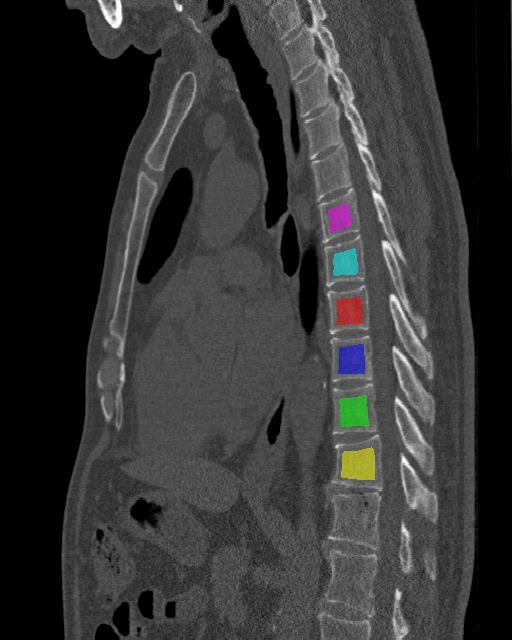

In [25]:
from IPython.display import Image, display
display(Image('/content/vBMD/Output/Sagittal/SagLower_sagittal_IM-0385_266.png'))